Preliminary characterization of the CNT furnace using an IR thermometer.

## Set-up
- Mounted the IR gun on a tripod and aimed it down the center of the tube.
- Placed a circular, quartz cap at the center of the tube; this is meant to simulate the thermal properties of the quartz chips, while providing a larger cross-section at which to focus the gun. 
- Aligned the gun using a half-length tube (2 ft), the alignment lasers on the gun would hit the sides of a full-length tube. It helped to align the lasers first on the ends of the tube (using plastic end caps), then to verify that they were aligned on the target.


## Measurement 1 
- Manually set the temperature controller for each temperature.
- Waited approx 10-20 minutes for temperature to settle after each adjustment.
- Read the temperature on the gun's display.

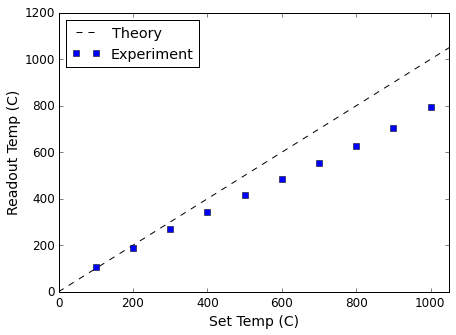

In [2]:
set_temps1, read_temps1 = loadtxt('../data/150527_IR_calibration_100step_01.txt', unpack = True)

plot(linspace(0,1100), linspace(0,1100), 'k--', label = 'Theory')
plot(set_temps1, read_temps1, 's', label = 'Experiment')
xlabel('Set Temp (C)')
ylabel('Readout Temp (C)')
legend(loc = 'best')
xlim(0,1050);

At high temperatures, the measured temperatures are significantly lower than the set point. The difference increases roughly linearly. Max difference is 200 C.

## Measurement 2
- Set the temperature through the Labview program: step 100 C every 20 min, from 400 to 1000 C (there are two steps at 500 C)
- Took data automatically through IR thermometer software, 0.1 Hz.

In [6]:
import csv
from datetime import datetime
import re

def load_IR_file(file):
    with open(file, 'rU') as csvfile:
        reader = csv.reader(csvfile, delimiter = '\t')
        next(reader)
        
        temps = []; tt = []
        for i, row in enumerate(reader):
            temp = float(re.findall('\d+\.?\d*', row[1])[0]) # in C
            temps += [temp]

            t = datetime.strptime(row[5].strip(), '%m-%d-%y/%H:%M:%S')
            if i == 0: t0 = t
            dt = (t - t0).total_seconds()
            tt += [dt]
    return tt, temps

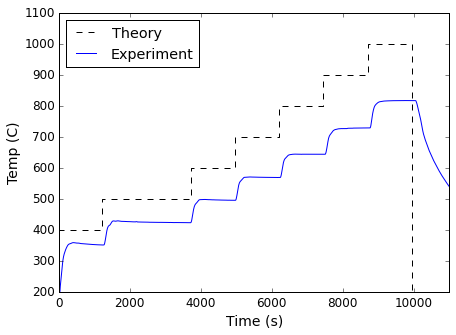

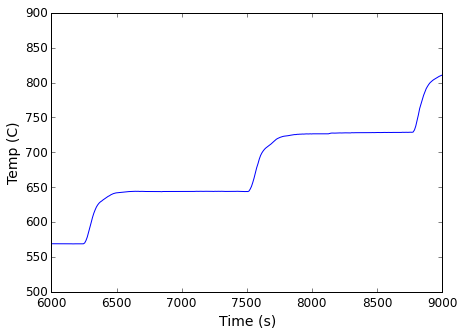

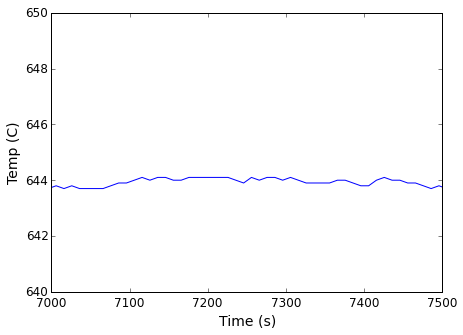

In [14]:
read_tt, read_temps = load_IR_file('../data/150527_IR_calibration_100step_02.xls')

set_temps = [400, 500, 500, 600, 700, 800, 900, 1000, 0]
t0 = -10; dt = 20.75*60
set_tt = arange(t0,dt*(len(set_temps)),dt)

plot_temps = [x for pair in zip(set_temps,set_temps) for x in pair]
plot_tt = concatenate(([set_tt[0]], [x for pair in zip(set_tt[1:],set_tt[1:]) for x in pair][:-1]))

plot(plot_tt, plot_temps, 'k--', label = 'Theory')
plot(read_tt, read_temps, label = 'Experiment')
legend(loc = 'best')
xlabel('Time (s)')
ylabel('Temp (C)')
xlim(0,11000)
ylim(200,1100);

figure()
plot(read_tt, read_temps)
xlabel('Time (s)')
ylabel('Temp (C)')
xlim(6000,9000)
ylim(500,900)

figure()
plot(read_tt, read_temps)
xlabel('Time (s)')
ylabel('Temp (C)')
xlim(7000,7500)
ylim(640,650);

The settling time is roughly 5 minutes for each step. After that, the temperature remains constant to within a few degrees. No significant overshoot is observed.

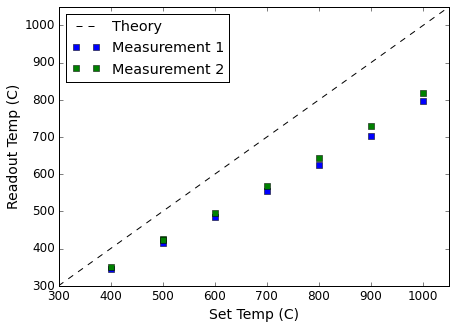

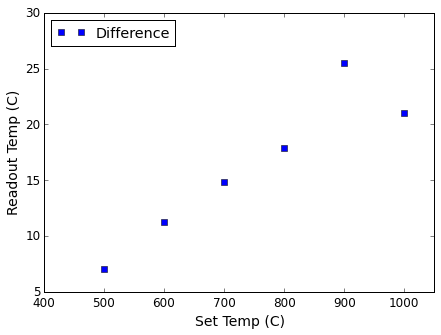

In [28]:
equil_temps = []
for t in set_tt[1:-1]:
    i0 = abs(read_tt-t).argmin()
    equil_temps += [mean(read_temps[(i0-10):(i0-5)])]
    
x0 = 300; x1 = 1050
plot(linspace(x0,x1), linspace(x0,x1), 'k--', label = 'Theory')
plot(set_temps1, read_temps1, 's', label = 'Measurement 1')
plot(set_temps[:-1], equil_temps, 's', label = 'Measurement 2')
xlabel('Set Temp (C)')
ylabel('Readout Temp (C)')
legend(loc = 'best')
ylim(x0,x1)
xlim(x0,x1)
    
figure()
x0 = 300; x1 = 1050
# plot(linspace(x0,x1), linspace(x0,x1), 'k--', label = 'Theory')
plot(set_temps[2:-1], equil_temps[2:] - read_temps1[-(len(equil_temps)-2):], 's', label = 'Difference')
# plot(set_temps[:-1], equil_temps, 's', label = 'Measurement 2')
xlabel('Set Temp (C)')
ylabel('Readout Temp (C)')
legend(loc = 'upper left')
# ylim(x0,x1)
xlim(400,x1);

The difference between the two measurements is significant. It generally increases for higher temperatures, with the exception of a peak at 900 C.